 
# Titanic Dataset Project 
- **Program**: Data Science and Application
- **Course**: Python Programming
- **Project Group**: Shailja Singh, Mahnaz Farshid Nia, Ran Feng, Rasoul Keshavarz

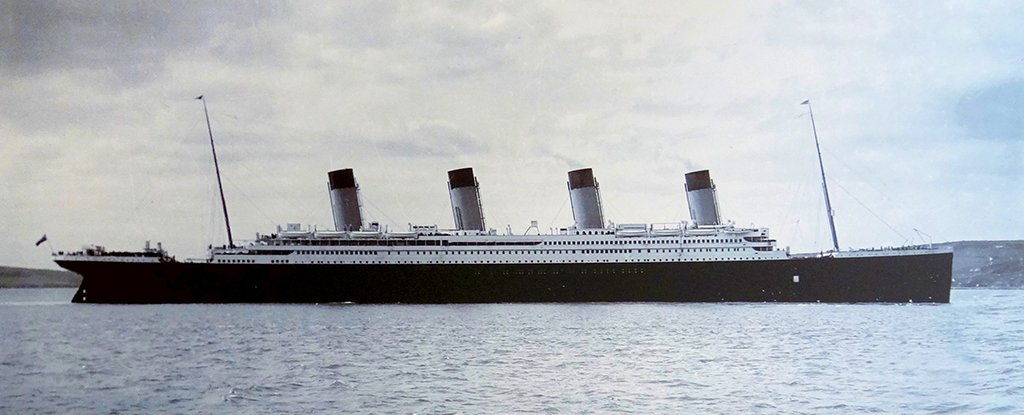

## <center>1.  Data Exploration

**Importing the libraries:**

In [1]:
import os
import math
import scipy # collection of mathematical algorithms 
import numpy as np #linear algebra
import pandas as pd #data processing,CSV File I/O
import matplotlib.pyplot as plt #creating static, animated, and interactive visualizations
import seaborn as sns #library for making statistical graphics in Python
from sklearn import tree #machine learning 
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display
!pip install imblearn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


**Importing the dataset "Titanic":**

In [2]:
import pandas as pd
T = pd.read_csv("titanic_data.csv")
print(T)
target = 'Survived'
labels = ['Not-Survived','Survived'] #list
features = [i for i in T.columns.values if i not in [target]]
original_T = T.copy(deep=True)
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(T.shape[1], T.shape[0]))


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

**Checking the dtypes of all the columns:**

In [3]:
T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Head and tail of the dataset:

In [4]:
T.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
T.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Other Genernal Information:

In [6]:
len(T)

891

In [7]:
print(T.size)

10692


In [8]:
print(T.shape)

(891, 12)


In [9]:
print(T.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## <center>2. Exploratory Data Analysis (EDA)
    

                      Target Variable Distribution                     


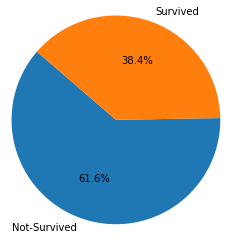

In [10]:
print('\033[1mTarget Variable Distribution'.center(75))
plt.pie(T['Survived'].value_counts(), labels=['Not-Survived','Survived'], counterclock=False, autopct='%1.1f%%', radius=1.2, startangle=1) 

plt.show()

In [11]:
numOfUnique = T[features].nunique().sort_values()
numFeature = []; cateFeature =[]; numNumericalFeat = 0; numCateFeat = 0; #numerical & categorical features

for i in range(T[features].shape[1]):
    if numOfUnique.values[i]<=15:cateFeature.append(numOfUnique.index[i])
    else:  numFeature.append(numOfUnique.index[i])
        
print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(numFeature),len(cateFeature)))        


Inference: The Datset has 6 numerical & 5 categorical features.


In [12]:
####  Inference: The Target Variable seems to be slightly imbalanced! Hence we shall try to perform data augmentation.
#### Data Augmentation is a technique that can be used for making updated copies of images in the data set
#### to artificially increase the size of a training dataset. 
#### This technique is very useful when the training data set is very small.

#### Visualising the categorical features 
* showes in plot the number of catecorical featuers count  in different categories 


                               Visualising Categorical Features:                                


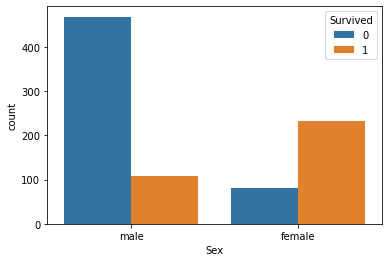

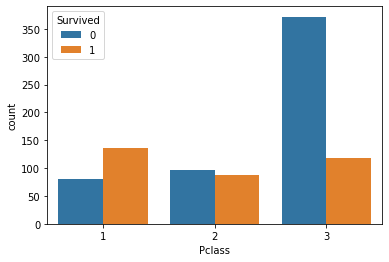

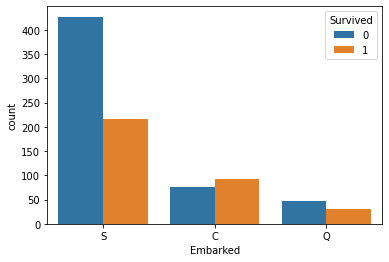

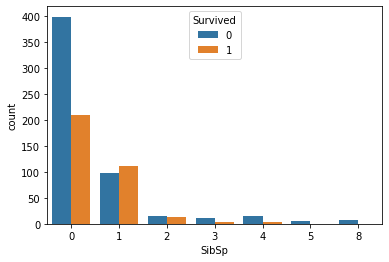

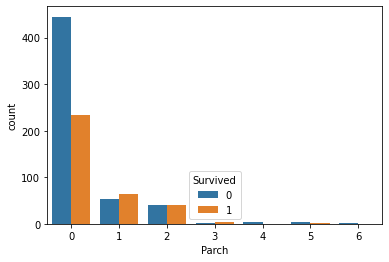

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Parch, dtype: int64

In [13]:
print('\033[1mVisualising Categorical Features:'.center(100))

#Male/Female
sns.countplot(x=T['Sex'],hue=T['Survived'])
plt.show()
T.groupby(by=['Sex','Survived'])['Sex'].count()

#Pclass
sns.countplot(x=T['Pclass'],hue=T['Survived'])
plt.show()
T.groupby(by=['Pclass','Survived'])['Pclass'].count()

#Embarked
sns.countplot(x=T['Embarked'],hue=T['Survived'])
plt.show()
T.groupby(by=['Embarked','Survived'])['Embarked'].count()

#Sibling
sns.countplot(x=T['SibSp'],hue=T['Survived'])
plt.show()
T.groupby(by=['SibSp','Survived'])['SibSp'].count()

#Parent child
sns.countplot(x=T['Parch'],hue=T['Survived'])
plt.show()
T.groupby(by=['Parch','Survived'])['Parch'].count()

Inference: Visualizing the categorical features reveal lot of information about the dataset.

In [14]:
#Understanding the relationship between all the features
# find out the relationship between all dataset variables 

#Pairplot allows us to plot pairwise relationships between variables within a dataset. 
#This creates a nice visualisation and helps us understand the data by summarising a 
#large amount of data in a singlefigure



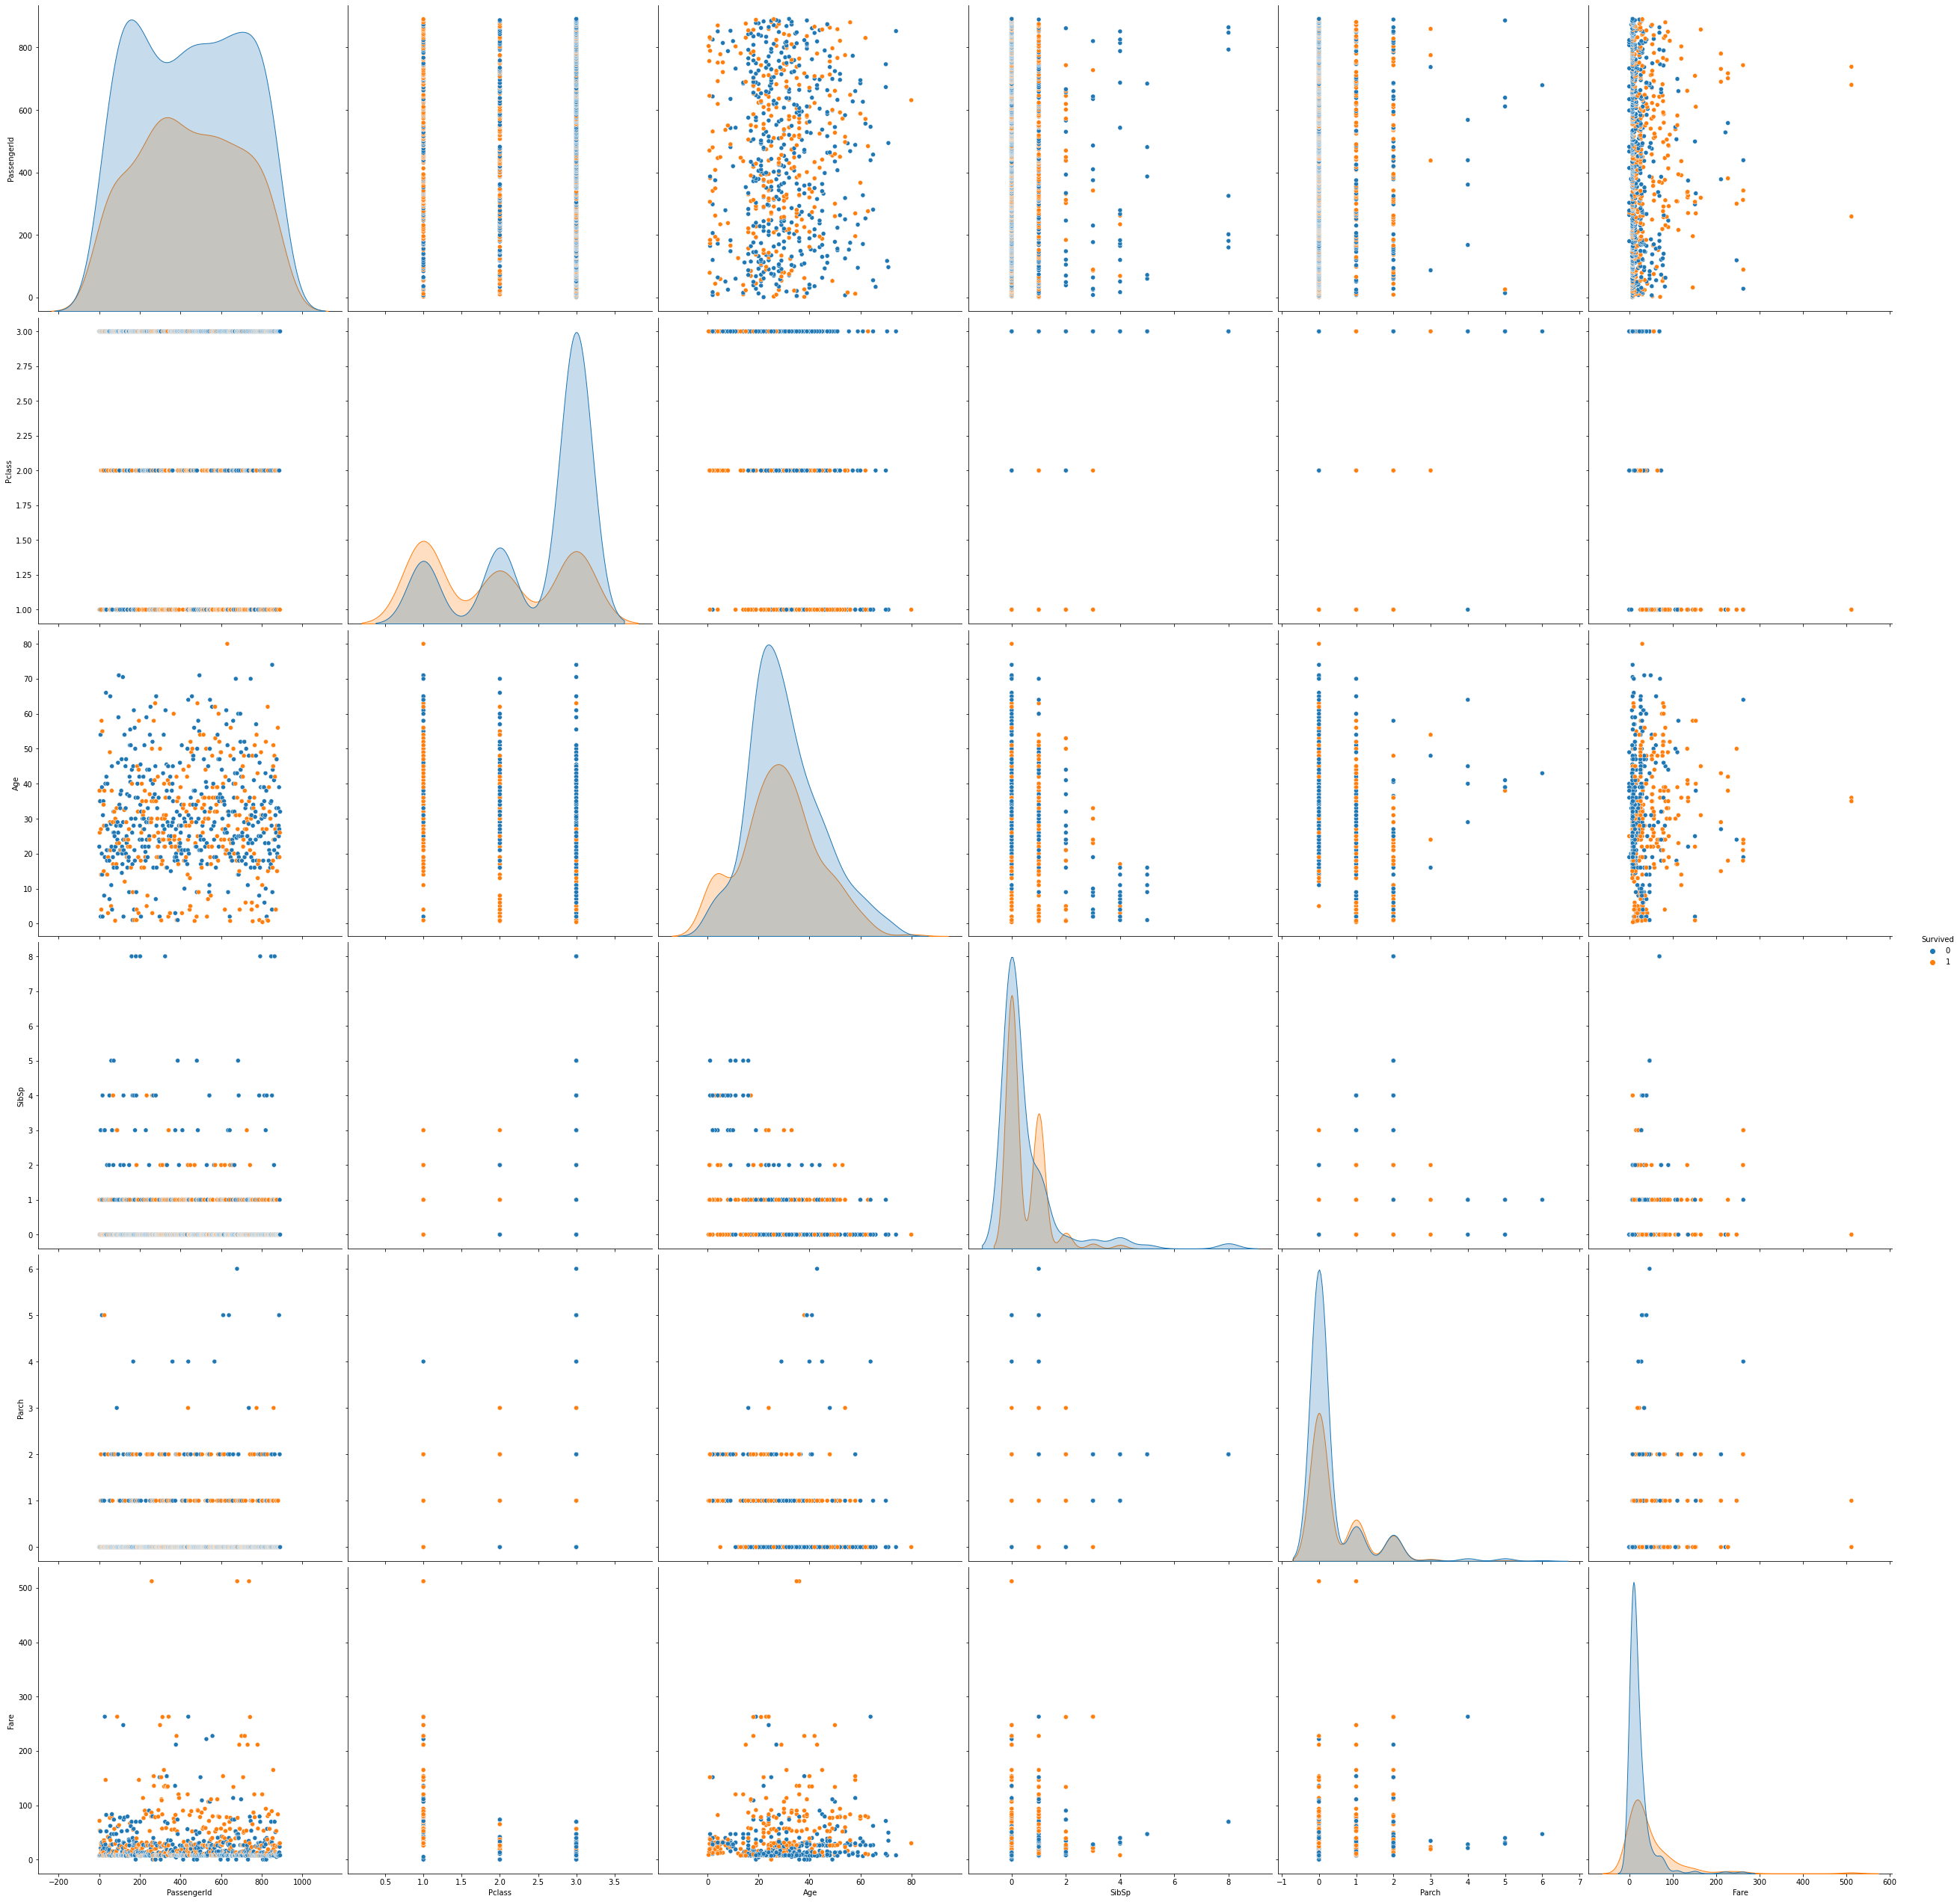

In [15]:
g=sns.pairplot(T, hue=target, size=6)
plt.show()

## <center>3.  Data Pre-processing

In [16]:
T.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### A.	Remove duplicated values 
* This dataset has 891 rows and 12 columns.


#### Check whether there are any duplicated rows in our dataset by using .duplicates() in pandas. 

In [17]:
T.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**It still shows 891 rows and 12 columns remained after we apply the drop_duplicates().  Which is same as the original shape of the dataset, hence, there is no duplicate values.  We know that each row represents a unique passenger on Titanic.**

### B.	Missing values
This dataset contains a couple of missing values.  

In [18]:
print(T.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**The column ‘Cabin’ contains 687 missing values.  The column ‘Embarked’ has only two missing values.  The column ‘Age’ had 177 missing values.  Other columns have no missing values.** 

Text(0.5, 1.0, 'Missing Values')

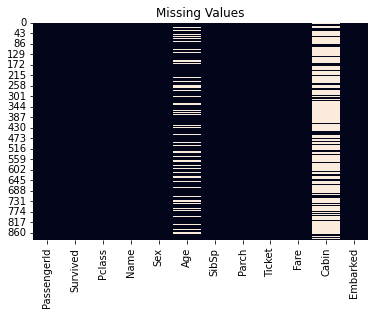

In [19]:
sns.heatmap(T.isnull(), cbar = False).set_title("Missing Values")

### C.	Attributes

In [20]:
T.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

- *The attributes ‘Survived’, and ‘Sex’ contains two possible values.*
- *The attributes ‘Pclass’ and ‘Embarked’ contains three possible values.*
- *The attributes ‘SibSp’ and ‘Parch’ contains seven possible values.*


### D.	Dropping columns
- The column ‘Cabin’ is dropped because it contains 77% missing values.  
- The “Ticket” column is dropped because it does not contain useful information.

In [21]:
PNull = pd.DataFrame(T.isnull().sum().sort_values(),columns=['Total Null Values'])

PNull['%']=round(PNull['Total Null Values']/T.shape[0],4)*100

print(PNull)

             Total Null Values      %
PassengerId                  0   0.00
Survived                     0   0.00
Pclass                       0   0.00
Name                         0   0.00
Sex                          0   0.00
SibSp                        0   0.00
Parch                        0   0.00
Ticket                       0   0.00
Fare                         0   0.00
Embarked                     2   0.22
Age                        177  19.87
Cabin                      687  77.10


### E.	Categories:

In [22]:
PassengerId_input = float(input("Enter PassengerId: "))

data_filter = (T["PassengerId"] == PassengerId_input) 
suitable_crop = T.loc[data_filter].values[0]

print(suitable_crop)

Enter PassengerId: 66
[66 1 3 'Moubarek, Master. Gerios' 'male' nan 1 1 '2661' 15.2458 nan 'C']



##### E1. Survived 
contains two categories: 1,0
- “1” indicates the passenger who had survived.
- “0” indicates the passenger who had died.


##### E2. Pclass
shows the passenger divisions. There are three sections: Pclass 1, Pclass 2 and Pclass 3.


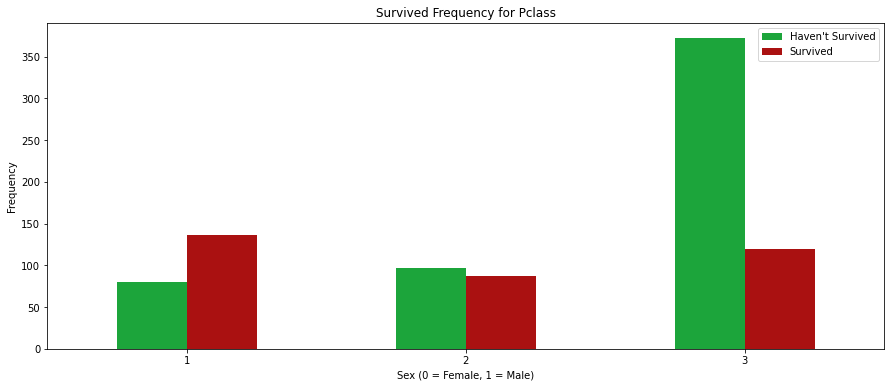

In [23]:
pd.crosstab(T.Pclass,T.Survived).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Survived Frequency for Pclass')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Survived", "Survived"])
plt.ylabel('Frequency')
plt.show()


In [24]:

#Taking the percentage of passenger class who survived
#there are 3[1][2][3] classes and 1 for survived and 0 for not survived
grpdata = T.groupby(by = ['Pclass', 'Survived'])['Pclass'].count()
print(grpdata)

a = grpdata[1][1]/(grpdata[1][0]+grpdata[1][1])*100
b = grpdata[2][1]/(grpdata[2][0]+grpdata[2][1])*100
c = grpdata[3][1]/(grpdata[3][0]+grpdata[3][1])*100

print('% survived in 1st class ', a)
print('% survived in 2nd class ', b)
print('% survived in 3rd class ', c)


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64
% survived in 1st class  62.96296296296296
% survived in 2nd class  47.28260869565217
% survived in 3rd class  24.236252545824847


##### E3. Sex
contains two categories: male and female. 

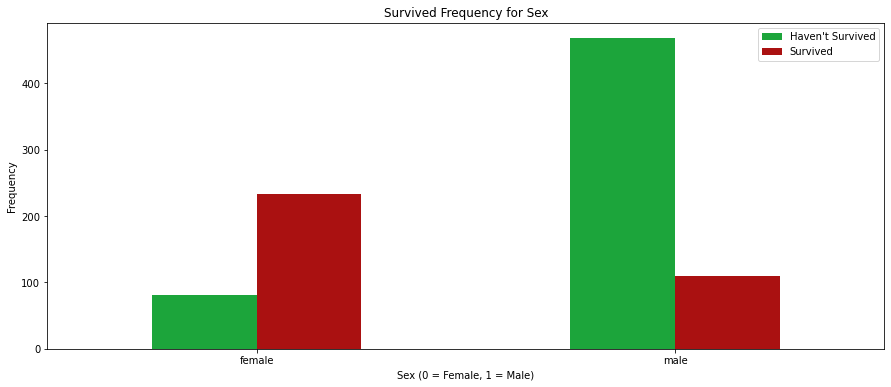

In [25]:
pd.crosstab(T.Sex,T.Survived).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Survived Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Survived", "Survived"])
plt.ylabel('Frequency')
plt.show()

In [26]:
#How many % of Male and female Survived

grpdata1 = T.groupby(by=['Sex','Survived'])['Sex'].count()

a1 = grpdata1['male'][1]/(grpdata1['male'][0]+grpdata1['male'][1])*100
b1 = grpdata1['female'][1]/(grpdata1['female'][0]+grpdata1['female'][1])*100
print('% survival of Males ', a1)
print('% survival of Females ', b1)

% survival of Males  18.890814558058924
% survival of Females  74.20382165605095


##### E4. Age
The youngest traveller is at the age of 0.42 * 12months = 5months. The oldest traveller is at the age of 80.  It contains almost 20% (177/891) missing values.  We could use mean(Age) 29.96 to replace the missing value if there is a need in data analysis.  Or we could simply assign all the missing values with “NA”.

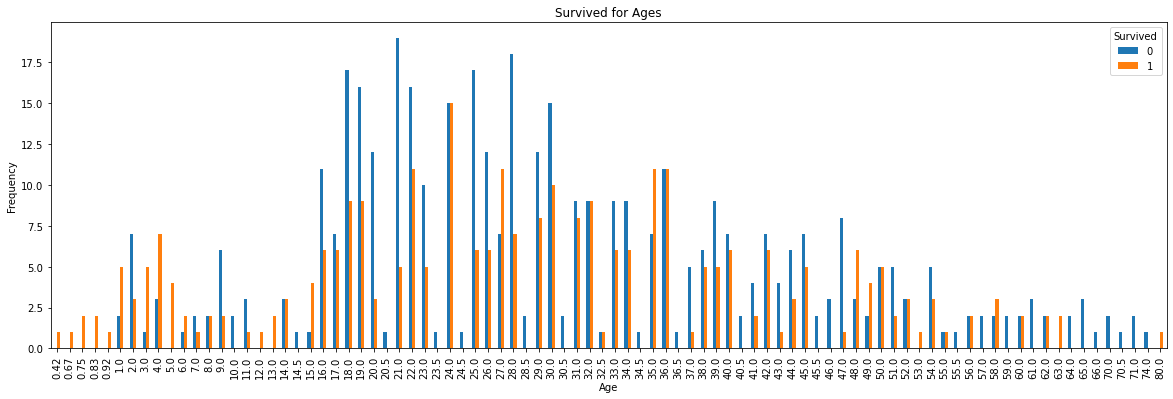

In [27]:
pd.crosstab(T.Age,T.Survived).plot(kind="bar",figsize=(20,6))
plt.title('Survived for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('SurvivdedAndAges.png')
plt.show()

##### E5. SibSp 
is the number of siblings or spouse of a passenger onboard.  Min(SibSp) is 0, it indicates the passenger travels alone.  Max(SibSp) is 8, it indicates the passenger travels with the family.

##### E6. Parch 
is the number of parents or children of a passenger onboard.  Min(Parch) is 0, it indicates the passenger travels without parents or children.  Max (Parch) is 6, it indicates the passenger travels with the family.


##### E7. Fare 
shows the price of the ticket.  We are interested in the relationship between survival and the ticket price.  In our prediction, the higher a fare price, more chance for a passenger to survive. Level of the ticket price: Low 0-7.91, Mid 7.92-14.45, High-mid 14.46-31, High >31.  Since the max (Fare) = 512.33, it could contain some outliners while we are doing the analysis.

##### E8. Embarked
implies where the traveller mounted from.  There are three categories: C stands for Cherbourg, S stands for Southampton, and Q stands for Queenstown.

##### E9. Names
includes many titles such as: Mr., Mrs., Miss, Dr. etc.  We need to extract the titles for each passenger from their name, and form a new name under column “Title”.

In [28]:
T1=T.copy()
T1['titles'] = T.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
print(T1['titles'])

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: titles, Length: 891, dtype: object


### F.	Combine columns

E5 and E6 contain the similar information.  Columns ‘SibSp’ and ‘Parch’ values  could be combined as two categories: passenger travelling alone and passenger travels with the family.  A new column with a name of ‘familysize’ is added to the dataset/new data table.  ‘1’ indicates the passenger travelling alone and all other numbers indicates the passenger travelling with the family.  The max(T.familysize) indicates a maximum size of a traveled family is 11.  

In [29]:
T['familysize']=T.Parch+T.SibSp+1
print(T)
print(min(T.familysize))
print(max(T.familysize))


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

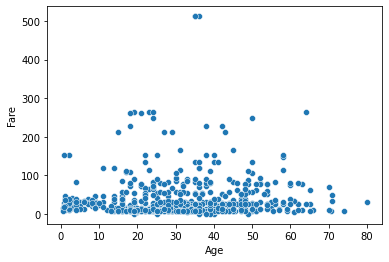

In [30]:
sns.scatterplot(x=T['Age'],y=T['Fare'])
plt.show()

## <center>4. Data Imputation

#### A.	A new data frame is created and named T1.  The original table is stored in T.

In [31]:
T1=T.copy()
T1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


#### B.	Fare_Level is created to show different level in price of the tickets.

In [32]:
T1['Fare_Level'] = pd.cut(T1['Fare'], bins=[0,7.91,14.45,31.00,512.33], labels=['Low','Mid','High_Mid','High'])
T1['Fare_Level']


0           Low
1          High
2           Mid
3          High
4           Mid
         ...   
886         Mid
887    High_Mid
888    High_Mid
889    High_Mid
890         Low
Name: Fare_Level, Length: 891, dtype: category
Categories (4, object): ['Low' < 'Mid' < 'High_Mid' < 'High']

#### C.	LabbelEncoder is used to encode the ‘Sex’ column into a numeric data.  The ‘male’ and ‘female’ values will be assigned to different numbers, in this case ‘0’ for female and ‘1’ for male.

In [33]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(T1['Sex'])
le.classes_
T1['Sex']=le.transform(T1['Sex'])
print(T1['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32


In [34]:
T.columns
T['Sex'].replace(['male', 'female'],
                  [1, 0], inplace=True)
T

T.Sex.value_counts()


1    577
0    314
Name: Sex, dtype: int64

#### D.	Embarked contains two missing values, we decide to fill it with the largest number of commuters.  mode () provides the most frequently town.

In [35]:
print(T1['Embarked'].isnull().sum())

2


In [36]:
T1.Embarked.fillna(T1.Embarked.mode()[0], inplace = True)

print(T1['Embarked'].isnull().sum())

0



**After filling the missing value, it would be changed to numeric values by using dummies in Pandas.**

In [37]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

print(is_numeric_dtype(T1['Embarked']))
print(is_string_dtype(T1['Embarked']))

False
True


In [38]:
Emb = pd.get_dummies(T1.Embarked, prefix="Emb")
print(Emb)

T1['Emb_C']=Emb['Emb_C']
T1['Emb_Q']=Emb['Emb_Q']
T1['Emb_S']=Emb['Emb_S']

     Emb_C  Emb_Q  Emb_S
0        0      0      1
1        1      0      0
2        0      0      1
3        0      0      1
4        0      0      1
..     ...    ...    ...
886      0      0      1
887      0      0      1
888      0      0      1
889      1      0      0
890      0      1      0

[891 rows x 3 columns]



#### E.	Drop columns: Cabin,Ticket, SibSp, Parch and Embarked


In [39]:
T1.drop(['Ticket','Cabin','SibSp','Parch','Embarked'],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,familysize,Fare_Level,Emb_C,Emb_Q,Emb_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,2,Low,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,2,High,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,1,Mid,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,2,High,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,1,Mid,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,13.0000,1,Mid,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,30.0000,1,High_Mid,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,23.4500,4,High_Mid,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,30.0000,1,High_Mid,1,0,0


#### F.	Filling missing values for Age column:

In [40]:
print(T1['Age'].isnull().sum())
print(T1['Age'].mean())
print(T1['Age'].median())
print(T1['Age'].mode())

177
29.69911764705882
28.0
0    24.0
Name: Age, dtype: float64


In [41]:
group=T1.groupby(['Sex'])
T1["Age"]=group.Age.apply(lambda x: x.fillna(x.mean()))
T1.Age.fillna(T1.Age.mean, inplace = True)

In [42]:
print(T1['Age'].isnull().sum())
print(T1['Age'].mean())
print(T1['Age'].median())
print(T1['Age'].mode())

0
29.736034227171242
30.0
0    30.726645
Name: Age, dtype: float64


##### G Outliers of Fare:

In [43]:
mean_Fare =T1['Fare'].mean()
print(mean_Fare)

32.2042079685746


<AxesSubplot:>

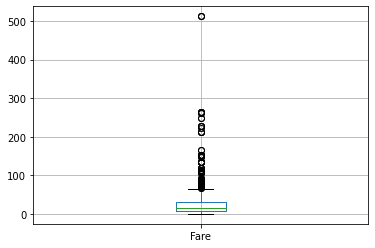

In [44]:
T1.boxplot('Fare')

In [45]:
T3 = T1.copy()
for x in ['Fare']:
    q75,q25 =np.percentile(T3['Fare'],[75,25])
    IQR = q75-q25
    
    max = q75+(1.5*IQR)
    min = q25-(1.5*IQR)
    
    T3.loc[T3[x] < min,x] = np.nan
    T3.loc[T3[x] > max,x] = np.nan


In [46]:
T3['Fare'].isnull().sum()

116

In [47]:
T3.Fare.fillna(mean_Fare,inplace=True)
T3['Fare'].isnull().sum()

0

<AxesSubplot:>

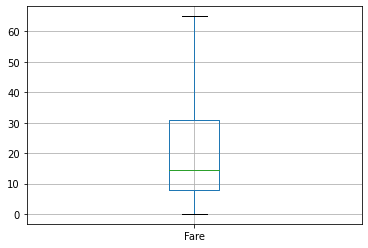

In [48]:
T3.boxplot('Fare')

S 
## <center>5. Data Manipulation

In [57]:
T4 =T1.copy()
T4.pop("Cabin")

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [58]:
T4.pop("familysize")

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: familysize, Length: 891, dtype: int64

In [59]:
T4.pop("Fare_Level")

0           Low
1          High
2           Mid
3          High
4           Mid
         ...   
886         Mid
887    High_Mid
888    High_Mid
889    High_Mid
890         Low
Name: Fare_Level, Length: 891, dtype: category
Categories (4, object): ['Low' < 'Mid' < 'High_Mid' < 'High']

In [60]:
T4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Emb_C,Emb_Q,Emb_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,27.915709,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C,1,0,0


In [61]:
pd.get_dummies(T4['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [62]:
sex = pd.get_dummies(T4['Sex'],drop_first=True)
embark = pd.get_dummies(T4['Embarked'],drop_first=True)

In [63]:
T4.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [64]:
T4 = pd.concat([T4,sex,embark],axis=1)

T4.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S,1,Q,S
0,1,3,22.0,1,0,7.2500,0,0,1,1,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,3,35.0,0,0,8.0500,0,0,1,1,0,1


In [65]:
#Splitting the data intro training & testing sets

T4.drop('Survived',axis=1).head()

X = T4.drop([target],axis=1)
Y = T4[target]

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (891, 12) (891,) 
Training set  --->  (712, 12) (712,) 
Testing set   --->  (179, 12)  (179,)



<center>
    <img src="https://raw.githubusercontent.com/rasoulkz/images/main/1.png" width="100%">
</center>


**For do analysis we need to convert categorical variable to numerical for variable `Sex`**

**Getting Correlation between the features in dataset**

In [66]:
T.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,familysize
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.065997
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.200988
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.217138
familysize,-0.040143,0.016639,0.065997,-0.200988,-0.301914,0.890712,0.783111,0.217138,1.000000


**Plot the correlation between features to undersatnd more details**

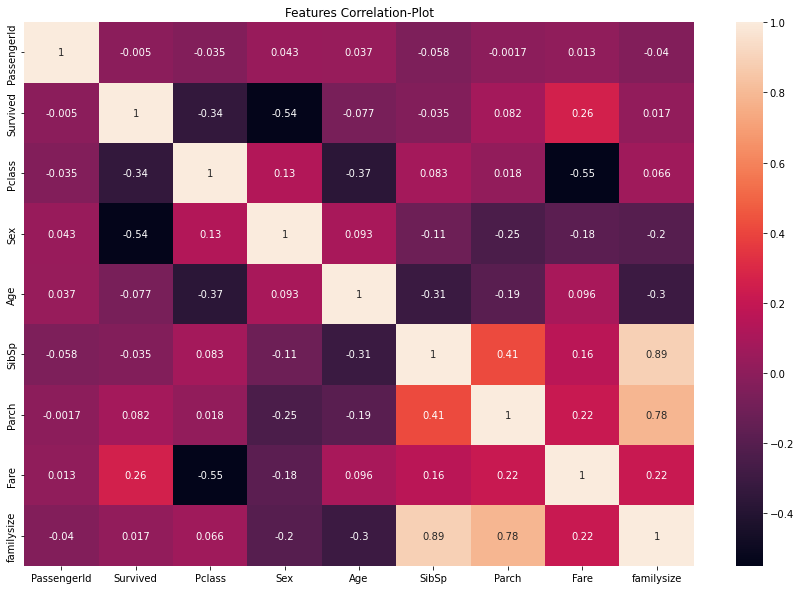

In [67]:
plt.figure(figsize=[15,10])
plt.title('Features Correlation-Plot')
sns.heatmap(T.corr(), annot=True)
plt.show()

 Note:\
 **In according to the correlation between sex and survived, It is clear that probably `women` were given more importance to save first.**

In [68]:
T[['Sex','Survived']].groupby(['Sex'],as_index=False).agg(['mean'])

,Survived
,mean
Sex,
0,0.742038
1,0.188908


**we can improve the model's performance by performing `Feature Selection`.
we are trying to add some variables that are related to each other and could impact on target variable,
so here we choose `sibsp` and `parch`.**
- `SibSp` is the number of sibling and spouse
- `Parch` is the number of parent and childeren

In [69]:
T1=T.copy()
T1['familysize']=T1['SibSp']+T1['Parch']+1


- we created new features as `familysize` that can potentially replace other two variables (SibSp,Parch).
- as we see in the following result, familysize columns, the people who traveled alone had a slightly lower probabilty\
  of survival, and the people who traveled together like family size of 4 was the highest survival rate with 72 percentage.


In [70]:
T1[['familysize','Survived']].groupby(['familysize'],as_index=False).agg(['count','sum', 'mean'])

Survived               
              count  sum      mean
familysize                        
1               537  163  0.303538
2               161   89  0.552795
3               102   59  0.578431
4                29   21  0.724138
5                15    3  0.200000
6                22    3  0.136364
7                12    4  0.333333
8                 6    0  0.000000
11                7    0  0.000000

**Another practical new variable as `Title`, we need to extract the titles of people from the `Name` column like Mr, Mrs, Miss, Dr, Major,..etc. and add those values in new column.**

In [71]:
T1['Title'] = T1.Name.str.extract('([A-Za-z]+)\.',expand=False)
T1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1,Mr


**now with this new feature as `Title`, we can take some more details of information of survivals from Dataset:**
- Checking out the Titles by their gender.
- The average of people who survived by their titles which most and least survived.
- Categorizing and segmenting into several groups and finally Converting them into numerical for future analysis.

In [72]:
#Checking out the Titles by their gender.

pd.crosstab(T1['Title'], T1['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


**The average of people who survived by their titles which most and least survived.**

In [73]:
T1['Title'] = T1['Title'].replace(['Lady', 'Countess','Capt', 'Col',
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

T1['Title'] = T1['Title'].replace('Mlle', 'Miss')
T1['Title'] = T1['Title'].replace('Ms', 'Miss')
T1['Title'] = T1['Title'].replace('Mme', 'Mrs')

In [74]:
T1[['Title', 'Survived']].groupby(['Title'], as_index=False).agg(['mean'])

,Survived
,mean
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Other,0.347826


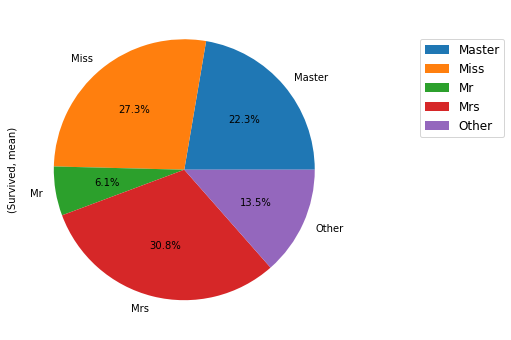

In [75]:
T1[['Title', 'Survived']].groupby(['Title'], as_index=False).agg(['mean']).plot.pie(subplots=True, figsize=(8, 6),
                                                                        autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.5,0.75), loc="center right", fontsize=12, 
         )
           
plt.show()

**Categorizing and segmenting into several groups and finally Converting them into numerical for future analysis.**

In [76]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
T2 = T1.copy()
T2['Title'] = [titles[x] for x in T2['Title']]
T2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,1,5
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1,1


In [77]:
T2['Title'].corr(T2['Survived'])
T2[['Sex','Title','Survived']].corr()

,Sex,Title,Survived
Sex,1.000000,-0.502713,-0.543351
Title,-0.502713,1.000000,0.407753
Survived,-0.543351,0.407753,1.000000


**Feature Selection by RFE method using Logistic Regression Model**

In [78]:
group=T1.groupby(['Sex'])
T1["Age"]=group.Age.apply(lambda x: x.fillna(x.median()))
T1['Fare']=[int(x) for x in T1['Fare']]

T1['Age']=[int(x) for x in T1['Age']]
features2 = [i for i in T1.columns.values if i not in ["Survived","Ticket","Name","Cabin", "Embarked","familysize","Title"]]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

x=T1[features2]
y=T1['Survived']

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(x,y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
print(features2)

features2 = np.array(features2)
fit.support_ = np.array(fit.support_)
selected = list(features2[fit.support_])
selected


Num Features: 3
Selected Features: [False  True  True False  True False False]
Feature Ranking: [5 1 1 3 1 2 4]
['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


['Pclass', 'Sex', 'SibSp']

**For more details of the 3 above features with the target variable 'Survived', we create a 3-dimensional scatter plot to see <br> the status of `Survived` and `Not-Survived` passengers.**

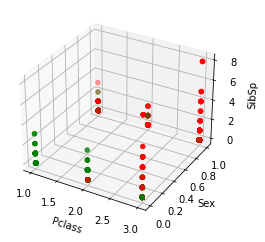

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

dim1 = x[selected[0]]
dim2 = x[selected[1]]
dim3 = x[selected[2]]

ax.set_xlabel(selected[0])
ax.set_ylabel(selected[1])
ax.set_zlabel(selected[2])

color = ["Red", "Green"]
colors = [color[i] for i in y]

ax.scatter(dim1, dim2, dim3, c=colors)

plt.show()

# 6. Predictive Modelling

In [80]:
#linearmodel is classifier or the object of class LinearRegression()

linearmodel = LinearRegression()


In [81]:
#fit a model
lm = linearmodel.fit(Train_X,Train_Y)

We predict the likelihood of a Survival using the logistic regression body we created

In [82]:
print("Score",lm.score(Test_X,Test_Y))

Score 0.4257630534825809


In [83]:
y_pred =lm.predict(Test_X)
y_pred

array([ 0.14270107,  0.09644948,  0.13410737,  0.98740577,  0.63470231,
        0.43621262,  0.91350717,  0.95369415,  0.48722307,  0.66097605,
        0.07976162,  0.7069156 ,  0.17449483,  0.90168942,  1.04088279,
        0.70777621,  0.14741909,  0.28976182,  0.0690648 ,  0.32517158,
        0.34697137,  1.02899843,  0.17335093,  0.43641311,  0.6557894 ,
        0.89438834,  0.08857972,  0.65583382,  0.79561133,  0.62648043,
        0.12674334,  0.64138901,  0.11550355,  0.43814498,  0.0605972 ,
        0.47127481,  0.0165359 ,  0.28065324,  0.30118023,  0.11487607,
        0.24662192,  0.17718853,  0.09868921,  0.01407753,  0.87896412,
        0.09762188,  0.09653452,  1.01561813,  0.21049139,  0.25511318,
        0.43520103,  0.52910132,  0.88341726,  0.17244038,  0.47885946,
        0.23089864,  0.23319201,  0.52234725,  0.07249347,  0.08442164,
        0.19780364,  0.57002326,  0.79816565,  0.48188589,  0.60296449,
        0.16491194,  0.81787509,  0.27636214,  0.89763785,  1.01

In [84]:
#mean squared error
mean_squared_error(Test_Y,y_pred)

0.13602754046587845

Text(0, 0.5, 'Predictions')

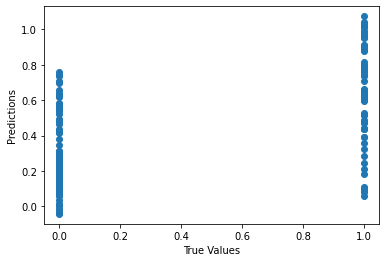

In [85]:
plt.scatter(Test_Y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [86]:
#Logistic Regression on Training Data

In [87]:
logmodel = LogisticRegression()
logmodel.fit(Train_X,Train_Y)

LogisticRegression()

In [88]:
logmodel.score(Test_X,Test_Y)

0.7932960893854749

In [89]:
predictions = logmodel.predict(Test_X)
predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [90]:
#Classification
print(classification_report(Test_Y,predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.71      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [91]:
y_pred_soft= logmodel.predict_proba(Test_X)

In [92]:
y_pred_soft[:,1]

array([0.14628493, 0.1496545 , 0.08538262, 0.88058657, 0.55547757,
       0.2947217 , 0.9122065 , 0.88550339, 0.39151684, 0.63304358,
       0.1451821 , 0.70712272, 0.10211952, 0.75609854, 0.87423325,
       0.61744547, 0.14015964, 0.1784506 , 0.14185307, 0.19103912,
       0.19772134, 0.92961207, 0.13690139, 0.29202766, 0.66084176,
       0.85960217, 0.13910376, 0.61399081, 0.78241953, 0.6062451 ,
       0.1252543 , 0.69470441, 0.12431754, 0.27262092, 0.12564823,
       0.33709392, 0.14435576, 0.25116935, 0.23705108, 0.15759576,
       0.27292449, 0.16349683, 0.14699748, 0.12229402, 0.83703594,
       0.11426234, 0.15050342, 0.92739814, 0.22456765, 0.25058836,
       0.34912165, 0.30272585, 0.78484333, 0.16040667, 0.36610167,
       0.2609079 , 0.22078992, 0.54406981, 0.12461299, 0.09434498,
       0.12327228, 0.530503  , 0.82786383, 0.370261  , 0.51483889,
       0.14295656, 0.82955399, 0.24519521, 0.76995582, 0.87906966,
       0.73010261, 0.30705022, 0.31339648, 0.11297417, 0.16098

In [93]:
#Accuracy Score
accuracy=accuracy_score(Test_Y,predictions)
accuracy

0.7932960893854749

In [94]:
#Confusion Matrix
accuracy=confusion_matrix(Test_Y,predictions)
accuracy

array([[93, 17],
       [20, 49]], dtype=int64)

In [95]:
pd.DataFrame({'Actual':Test_Y,'Predicted':predictions})

,Actual,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
780,1,1
837,0,0
215,1,1
833,0,0


In [96]:
#Confusion Matrix
cf_matrix=confusion_matrix(Test_Y,predictions)
cf_matrix

array([[93, 17],
       [20, 49]], dtype=int64)

<AxesSubplot:>

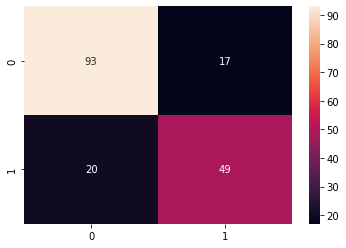

In [97]:
sns.heatmap(cf_matrix, annot=True)

In [98]:
#Binary class case Survived or Not
tn, fp, fn,tp = cf_matrix.ravel()
print(tn, fp, fn,tp)

93 17 20 49


In [99]:
#ROC curve

auc= roc_auc_score(Test_Y,predictions)
auc

0.7777997364953887

In [100]:
fpr, tpr, threshold= roc_curve(Test_Y,y_pred_soft[:,1])

In [101]:
pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':threshold})


,FPR,TPR,Threshold
0,0.000000,0.000000,1.951454
1,0.000000,0.014493,0.951454
2,0.000000,0.507246,0.704051
3,0.009091,0.507246,0.695026
4,0.009091,0.565217,0.664051
5,0.036364,0.565217,0.649136
6,0.036364,0.579710,0.633044
7,0.072727,0.579710,0.617445
8,0.072727,0.594203,0.613991
9,0.081818,0.594203,0.606245


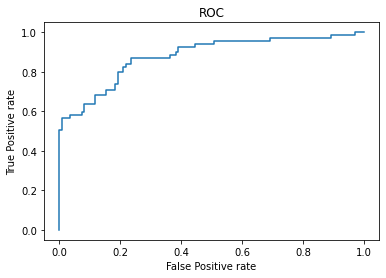

Area under the curve 0.7777997364953887


In [102]:
plt.plot(fpr,tpr)
plt.title('ROC')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()
print('Area under the curve', auc)

## 7. Conclusion

Here are some of the key outcomes of the project:

1.Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature-set.

2.Feature Selection/Eliminination was carried out and appropriate features were shortlisted.

3.Train-Test Split for Evaluating Machine Learning Algorithms.

4.Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive, but comes at the cost of slight misclassifications.

5.Evaluation Metric -Precision,Recall,F1-Score,Support is used to Predict the Model using Confusion Metric.

6.ROC AUC used to predict the model on various thresholds.


As a result of our work, we gained valuable experience of building prediction systems and achieved our best score 78.77% of correct predictions
• We performed featured engineering techniques 
• Changed alphabetic values to numeric 
• Calculated family size 
• Extracted title from name and deck label from ticket number 
• Used linear regression algorithm to fill in missing ages 
• We used several prediction algorithms in python 
• We achieved our best score 78.77% correct predictions 
